<a href="https://colab.research.google.com/github/khushi06bhatnagar/Conversion-of-OCR-from-GPU-to-CPU/blob/main/OCR_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 24.4 MB/s eta 0:00:00


Processing with GPU...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteText: 404, Probability: 0.63
Text: LNL, Probability: 0.40
Text: IJ OLJU, Probability: 0.32
Text: CHER, Probability: 0.34
Text: ECH 9076=, Probability: 0.36
Text: 580, Probability: 1.00
Text: "Ctc, Probability: 0.10
Text: 815, Probability: 1.00
Text: 4391, Probability: 0.40
Text: 58 |#RBC, Probability: 0.47
Text: 2846 EB:, Probability: 0.19
Text: Best OCR Models, Probability: 0.89
Text: For Text Recognition in Images, Probability: 1.00
Text: 4BEX972], Probability: 0.58


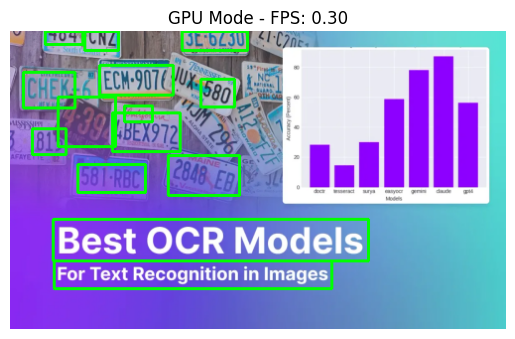

Processing with CPU...
Text: 404, Probability: 0.63
Text: LNL, Probability: 0.40
Text: IJ OLJU, Probability: 0.32
Text: CHER, Probability: 0.34
Text: ECH 9076=, Probability: 0.36
Text: 580, Probability: 1.00
Text: "Ctc, Probability: 0.10
Text: 815, Probability: 1.00
Text: 4391, Probability: 0.40
Text: 58 |#RBC, Probability: 0.47
Text: 2846 EB:, Probability: 0.19
Text: Best OCR Models, Probability: 0.89
Text: For Text Recognition in Images, Probability: 1.00
Text: 4BEX972], Probability: 0.58


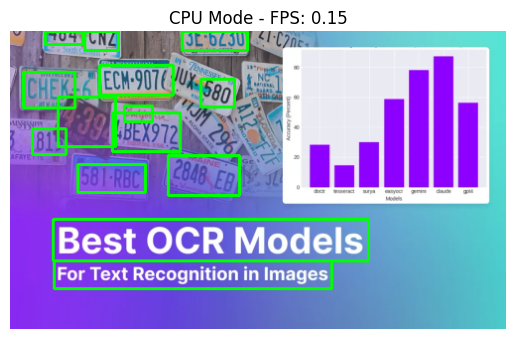


GPU FPS: 0.30, CPU FPS: 0.15

Accuracy Comparison:
GPU Text: 404 | CPU Text: 404
GPU Text: LNL | CPU Text: LNL
GPU Text: IJ OLJU | CPU Text: IJ OLJU
GPU Text: CHER | CPU Text: CHER
GPU Text: ECH 9076= | CPU Text: ECH 9076=
GPU Text: 580 | CPU Text: 580
GPU Text: "Ctc | CPU Text: "Ctc
GPU Text: 815 | CPU Text: 815
GPU Text: 4391 | CPU Text: 4391
GPU Text: 58 |#RBC | CPU Text: 58 |#RBC
GPU Text: 2846 EB: | CPU Text: 2846 EB:
GPU Text: Best OCR Models | CPU Text: Best OCR Models
GPU Text: For Text Recognition in Images | CPU Text: For Text Recognition in Images
GPU Text: 4BEX972] | CPU Text: 4BEX972]


In [1]:

!pip install opencv-python-headless easyocr matplotlib imutils

import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt
import imutils
import time

# Function to process image with OCR and measure FPS
def process_image_with_ocr(image_path, use_gpu=False):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}.")
        return None, None

    # Resize image
    image = imutils.resize(image, width=500)

    # Initialize OCR reader (use GPU or CPU based on parameter)
    reader = easyocr.Reader(['en'], gpu=use_gpu)

    # Start timer for FPS measurement
    start_time = time.time()

    # Perform OCR
    results = reader.readtext(image)

    # Stop timer and calculate FPS
    end_time = time.time()
    processing_time = end_time - start_time
    fps = 1 / processing_time if processing_time > 0 else 0  # Avoid division by zero

    # Display results bounding boxes and recognized text
    for (bbox, text, prob) in results:
        # Draw bounding box
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        br = (int(br[0]), int(br[1]))
        cv2.rectangle(image, tl, br, (0, 255, 0), 2)
        # Print recognized text and probability
        print(f"Text: {text}, Probability: {prob:.2f}")

    # Show image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"{'GPU' if use_gpu else 'CPU'} Mode - FPS: {fps:.2f}")
    plt.axis('off')  # Hide axes
    plt.show()

    return fps, results

# Specify the image path
image_path = "//content//ok.jpeg"  # Replace with your image path

# Process image using GPU
print("Processing with GPU...")
gpu_fps, gpu_results = process_image_with_ocr(image_path, use_gpu=True)

# Process image using CPU
print("Processing with CPU...")
cpu_fps, cpu_results = process_image_with_ocr(image_path, use_gpu=False)


# Check if gpu_fps and cpu_fps are not None before printing
if gpu_fps is not None and cpu_fps is not None:
    print(f"\nGPU FPS: {gpu_fps:.2f}, CPU FPS: {cpu_fps:.2f}")
else:
    print("Could not calculate FPS due to image loading issues.")

print("\nAccuracy Comparison:")
if gpu_results is not None and cpu_results is not None:
    for gpu_text, cpu_text in zip(gpu_results, cpu_results):
        print(f"GPU Text: {gpu_text[1]} | CPU Text: {cpu_text[1]}")
else:
    print("Could not retrieve OCR results due to processing issues.")
